In [82]:
#Importing necessary libraries: NumPy, Pandas, and Matplotlib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
#Reading the Titanic training dataset using Pandas.
titanic_data = pd.read_csv('titanic/train.csv')

In [84]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [85]:
"""" ANALYZING the Data:
The problem is to find what sort of people will survive. After make some 
asuption and analyziing the data we can say that the ticket number or the name of the person doent afect their 
survival probability.

"""


'" ANALYZING the Data:\nThe problem is to find what sort of people will survive. After make some \nasuption and analyziing the data we can say that the ticket number or the name of the person doent afect their \nsurvival probability.\n\n'

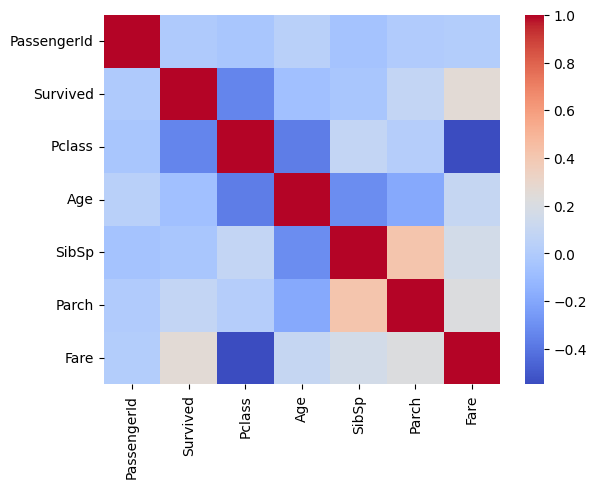

In [86]:
#Visualizing correlation between features in the dataset using 
#Seaborn's heatmap.
import seaborn as sns

sns.heatmap(titanic_data.corr(numeric_only=True), cmap="coolwarm")
plt.show()

In [87]:
""" analyzing the colloration we observe that: 
1. passenger id, age, parch and SidSp dosent collorate much with the survival rate
2. for ticket class(pClass) observe that the lower the ticket class the heighest the survival rate
3. Fare, the more expensive is the ticket the highest survival rate

ASSUMPTIONS:
In data set instead of male/famele make it numeric to see the procentage of male survivor vs famele survivor
The most important data are:
1.Survived
2.Pclass
3.Gender
"""

' analyzing the colloration we observe that: \n1. passenger id, age, parch and SidSp dosent collorate much with the survival rate\n2. for ticket class(pClass) observe that the lower the ticket class the heighest the survival rate\n3. Fare, the more expensive is the ticket the highest survival rate\n\nASSUMPTIONS:\nIn data set instead of male/famele make it numeric to see the procentage of male survivor vs famele survivor\nThe most important data are:\n1.Survived\n2.Pclass\n3.Gender\n'

In [88]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
"""Analyzing:
there are values that are incomplet 

Ideas:
1.just drop those values
2.put same values in order to complete them full
for age put a number at random or do the median of the availabel data
"""

'Analyzing:\nthere are values that are incomplet \n\nIdeas:\n1.just drop those values\n2.put same values in order to complete them full\nfor age put a number at random or do the median of the availabel data\n'

In [90]:
#Defining custom transformers using Scikit-learn's BaseEstimator 
#and TransformerMixin. Age transformer fills in missing values 
#in the Age feature with the mean. 

import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class Age(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X


In [91]:
#Encoder_str_to_num transformer converts categorical string features
#(Embarked and Sex) into numerical features using one-hot encoding. 

class Encoder_str_to_num(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()       
        col_names = ["C", "S", "Q", "N"]      
        for i in range(len(matrix.T)):
            X[col_names[i]] = matrix.T[i]
          
        matrix = encoder.fit_transform(X[['Sex']]).toarray()     
        col_names = ["Female", "Male"]
        for i in range(len(matrix.T)):
            X[col_names[i]] = matrix.T[i]
            
        return X


In [92]:
#DataDrop transformer drops features that are not useful 
#for the classification task.

class DataDrop(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [93]:
#Creating a Scikit-learn pipeline that applies the custom 
#transformers to the dataset in sequence.

from sklearn.pipeline import Pipeline

pipeline = Pipeline([("Age", Age()),
                     ("encoder", Encoder_str_to_num()),
                     ("drop_data", DataDrop())])

In [94]:
#Applying the pipeline to the training dataset.
titanic_data = pipeline.fit_transform(titanic_data)

In [95]:
titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [96]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   C            891 non-null    float64
 8   S            891 non-null    float64
 9   Q            891 non-null    float64
 10  Female       891 non-null    float64
 11  Male         891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


In [97]:
#Preparing the data for classification by standardizing the 
#features using StandardScaler and extracting the target variable.

from sklearn.preprocessing import StandardScaler

X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived'] # select only the 'Survived' column

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()


In [98]:
X_data

array([[-1.73010796,  0.82737724, -0.5924806 , ...,  0.61930636,
        -0.73769513,  0.73769513],
       [-1.72622007, -1.56610693,  0.63878901, ..., -1.61470971,
         1.35557354, -1.35557354],
       [-1.72233219,  0.82737724, -0.2846632 , ...,  0.61930636,
         1.35557354, -1.35557354],
       ...,
       [ 1.72233219,  0.82737724,  0.        , ...,  0.61930636,
         1.35557354, -1.35557354],
       [ 1.72622007, -1.56610693, -0.2846632 , ..., -1.61470971,
        -0.73769513,  0.73769513],
       [ 1.73010796,  0.82737724,  0.17706291, ..., -1.61470971,
        -0.73769513,  0.73769513]])

In [99]:
#scaled the data above to insure that all feutures are on the saem scale

In [100]:
#Defining a RandomForestClassifier and a grid of hyperparameters
#to search over using GridSearchCV.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500, 600], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 600]}],
             return_train_score=True, scoring='accuracy')

In [101]:
#selecting the best estimator
final_clf = grid_search.best_estimator_

In [102]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=10)

In [103]:
final_clf.score(X_data, y_data)

0.8462401795735129

In [104]:
titanic_test_data = pd.read_csv("titanic/test.csv")

In [105]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [106]:
X_final_test = final_test_data
#fills any massing values
X_final_test = X_final_test.fillna(method="ffill") 

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [107]:
predictions = final_clf.predict(X_data_final_test)

In [108]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("titanic/predictions.csv", index = False)

In [109]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
